In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import numpy as np
from IPython.display import display


In [2]:
sns.set(color_codes=True)

## Read the Data

In [3]:
try:
    df = pd.read_csv('../data/Econ.csv', encoding ='ISO-8859-1')
    print('Data read successfully!')
except Exception as e:
    print("Error reading data: {}".format(str(e)))

Data read successfully!


## Take a look at the Data 
### Kipchumba

In [4]:
df.head()

,City,riders,price,pop,income,rates
0,1,"192,000",$15,"1,800,000","$5,800",$50
1,2,"190,400",$15,"1,790,000","$6,200",$50
2,3,"191,200",$15,"1,780,000","$6,400",$60
3,4,"177,600",$25,"1,778,000","$6,500",$60
4,5,"176,800",$25,"1,750,000","$6,550",$60


In [5]:
df.tail()

,City,riders,price,pop,income,rates
22,23,"126,240",$86,"1,590,000","$15,000",$165
23,24,"123,888",$98,"1,595,000","$15,200",$175
24,25,"126,080",$87,"1,590,000","$15,600",$175
25,26,"151,680",$77,"1,600,000","$16,000",$190
26,27,"152,800",$63,"1,610,000","$16,200",$200


## Data Cleaning

In [6]:
## Remove all the $(dolla signs) in the rows price per week, monthly income of riders and avg parking rates

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
City      27 non-null int64
riders    27 non-null object
price     27 non-null object
pop       27 non-null object
income    27 non-null object
rates     27 non-null object
dtypes: int64(1), object(5)
memory usage: 1.4+ KB


### Remove commas and dollar signs in the data

In [8]:
cols = ['riders','pop','price','income','rates']
df[cols]=df[cols].replace({'\$':'',',':''},regex=True)
df[cols].astype(float)

,riders,pop,price,income,rates
0,192000.0,1800000.0,15.0,5800.0,50.0
1,190400.0,1790000.0,15.0,6200.0,50.0
2,191200.0,1780000.0,15.0,6400.0,60.0
3,177600.0,1778000.0,25.0,6500.0,60.0
4,176800.0,1750000.0,25.0,6550.0,60.0
5,178400.0,1740000.0,25.0,6580.0,70.0
6,180800.0,1725000.0,25.0,8200.0,75.0
7,175200.0,1725000.0,30.0,8600.0,75.0
8,174400.0,1720000.0,30.0,8800.0,75.0
9,173920.0,1705000.0,30.0,9200.0,80.0


In [9]:
df =df.astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
City      27 non-null float64
riders    27 non-null float64
price     27 non-null float64
pop       27 non-null float64
income    27 non-null float64
rates     27 non-null float64
dtypes: float64(6)
memory usage: 1.4 KB


In [11]:
df.info()
    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
City      27 non-null float64
riders    27 non-null float64
price     27 non-null float64
pop       27 non-null float64
income    27 non-null float64
rates     27 non-null float64
dtypes: float64(6)
memory usage: 1.4 KB


In [12]:
df.drop('City ',axis=1,inplace=True)

In [13]:
df.head()

,riders,price,pop,income,rates
0,192000.0,15.0,1800000.0,5800.0,50.0
1,190400.0,15.0,1790000.0,6200.0,50.0
2,191200.0,15.0,1780000.0,6400.0,60.0
3,177600.0,25.0,1778000.0,6500.0,60.0
4,176800.0,25.0,1750000.0,6550.0,60.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
riders    27 non-null float64
price     27 non-null float64
pop       27 non-null float64
income    27 non-null float64
rates     27 non-null float64
dtypes: float64(5)
memory usage: 1.2 KB


## Descriptive Analysis

In [15]:
stats = df.describe()
stats

,riders,price,pop,income,rates
count,27.000000,27.000000,2.700000e+01,27.000000,27.000000
mean,160026.074074,49.925926,1.680111e+06,11063.259259,107.037037
std,21301.097303,27.627921,6.780307e+04,3416.627944,45.346089
min,115696.000000,15.000000,1.590000e+06,5800.000000,50.000000
25%,149600.000000,27.500000,1.617500e+06,8400.000000,75.000000
50%,161600.000000,40.000000,1.695000e+06,11600.000000,100.000000
75%,176000.000000,75.000000,1.725000e+06,13888.000000,140.000000
max,192000.000000,102.000000,1.800000e+06,16200.000000,200.000000


## Exploratory Data Analysis

<Figure size 720x576 with 0 Axes>

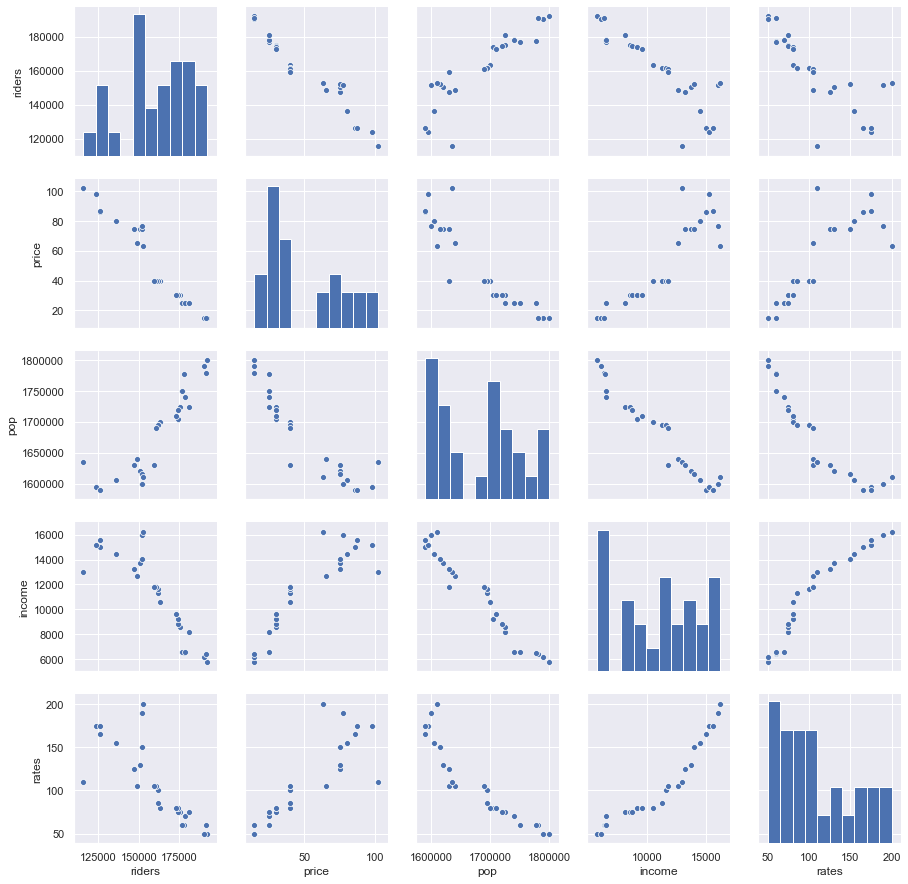

In [16]:
fig = plt.figure(figsize=(10,8))
sns.pairplot(df)
plt.show()



## Correlation

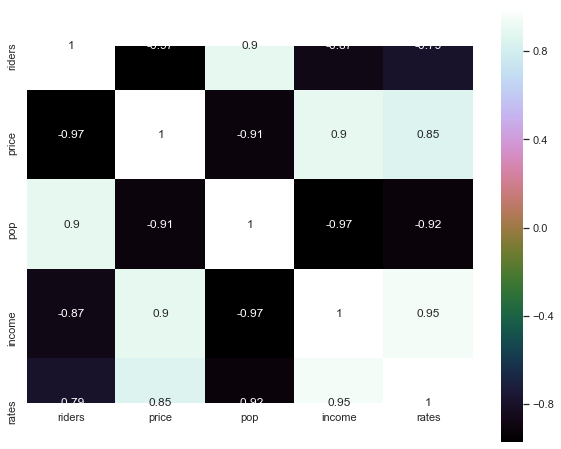

In [17]:
corr = df.corr()
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,square=True,cmap='cubehelix',vmax=1)
plt.show()

## Model Selection

In [18]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge

### Extract the data

In [19]:

X = df.drop(columns ='riders',axis=1)

y =df['riders'].values.reshape(-1,1)

In [20]:
models=LinearRegression(),Lasso(alpha=10000),Ridge(alpha=100)
models_names = ['LR','Lasso','Ridge']
scores={}
for i,model in enumerate(models):
    score=np.mean(cross_val_score(model,X,y,cv=5,scoring='neg_mean_squared_error'))
    scores[models_names[i]]=score
print(scores)

{'LR': -59086460.76294605, 'Lasso': -44630983.7657749, 'Ridge': -53780956.3482818}


## Model Tuning

In [21]:
## Optimization of parameters for the model selected
from sklearn.model_selection import GridSearchCV
params ={'alpha':[0.0001,0.001,0.01,0.1,1,10,100,10000,100000]}


In [22]:
gridsearch = GridSearchCV(Lasso(),params,cv=5,scoring='neg_mean_squared_error')

In [23]:
gridsearch.fit(X,y)

c:\users\sir kipchumba\pycharmprojects\firstpythonproject\venv\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 10000,
                                   100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [24]:

gridsearch.best_score_

-41857629.24097573

## Model Training

In [25]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.3,random_state=50)

In [26]:
model=Lasso()
model.fit(X_train,y_train)
#Predict for y which will later be used for evaluation
preds= model.predict(X_test)

## Model Evaluation

In [27]:
from sklearn.metrics import r2_score
r2 =r2_score(y_test,preds)


In [28]:
r2

0.8603222813112987

In [29]:
model.intercept_

array([28008.29614773])

In [30]:
model.coef_

array([-4.33130830e+02,  9.71232194e-02, -9.53259968e-01, -5.09212149e+00])

## Model

In [33]:
'''y =28008-32(X1)+(X2)-4(X3)-5(X4)''' 

'y =28008-32(X1)+(X2)-4(X3)-5(X4)'